<a href="https://colab.research.google.com/github/Madhuvarma8008/AIML-2025/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/drive/MyDrive/aiml/titanic_train.csv')
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.shape

(891, 12)

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


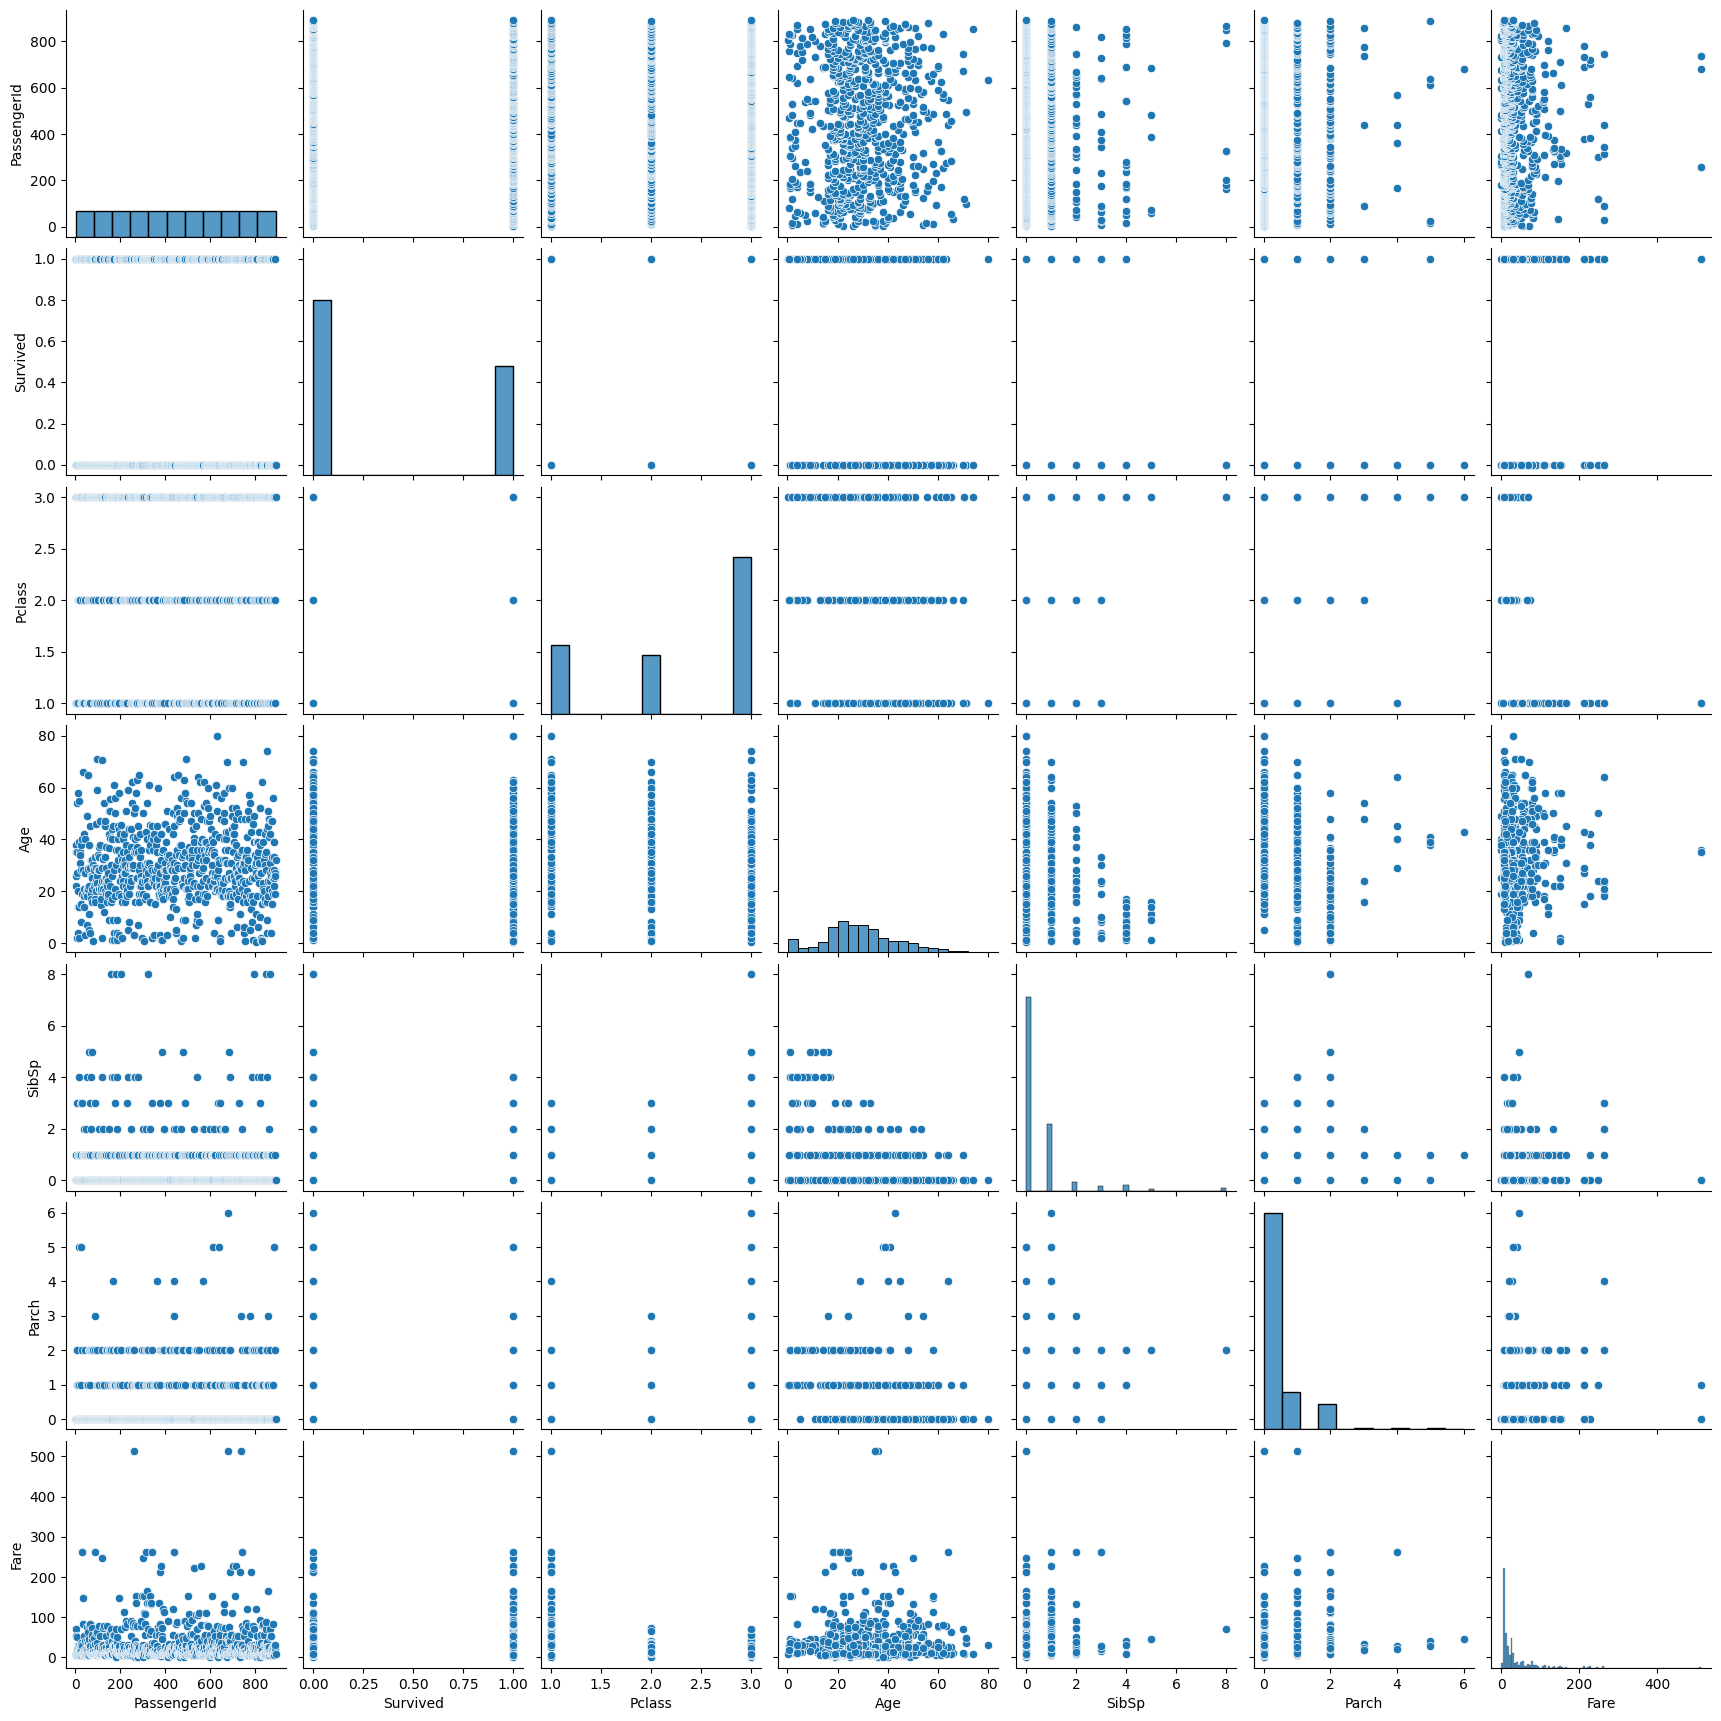

In [8]:
sns.pairplot(df)

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

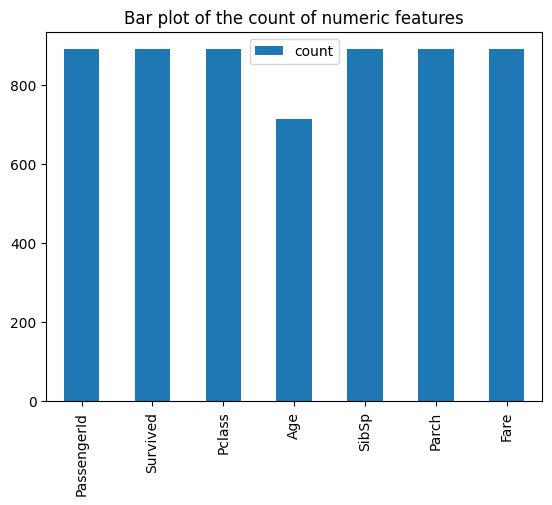

In [9]:
d = df.describe()
d = d.T
d.plot.bar(y="count")
plt.title("Bar plot of the count of numeric features")

In [10]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

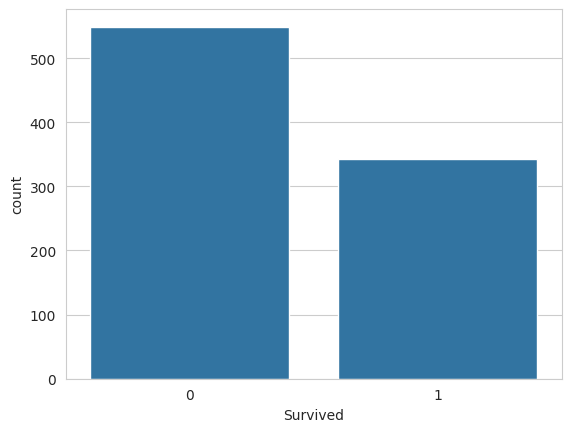

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

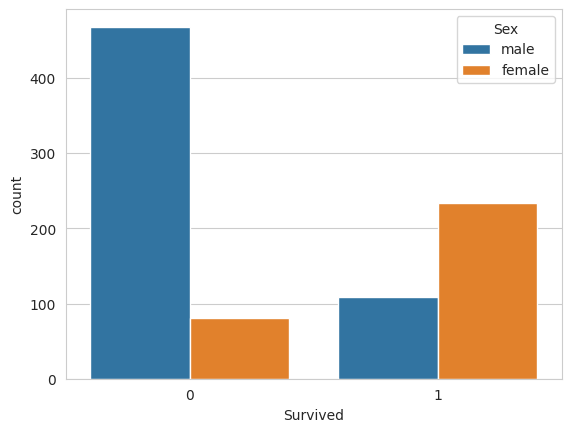

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

<Axes: xlabel='Survived', ylabel='count'>

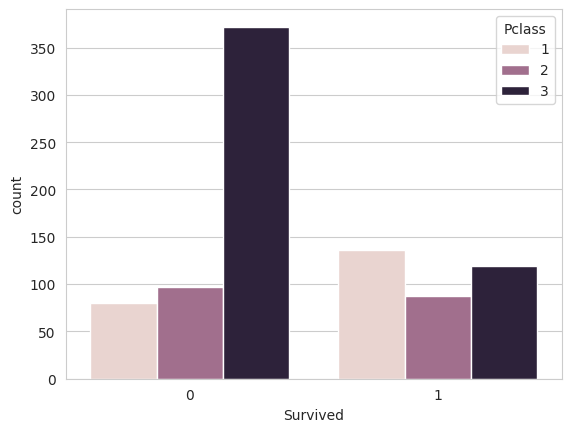

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Sur')

ValueError: Could not interpret value `Sur` for `x`. Value is a string, but `data` was not passed.

<Axes: title={'center': 'HIstogram if the passengers'}, xlabel='Age of the passengrers ', ylabel='Count'>

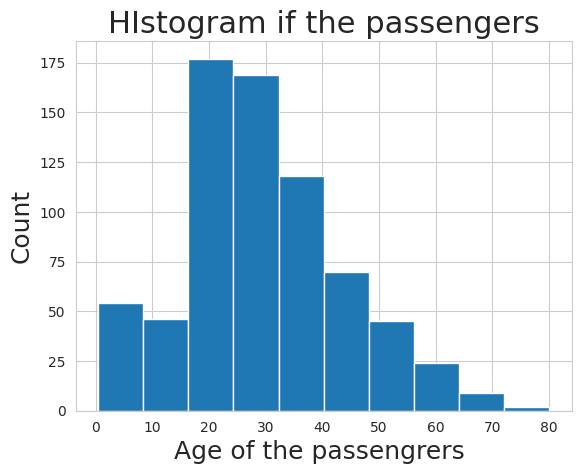

In [16]:
plt.xlabel("Age of the passengrers ",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("HIstogram if the passengers",fontsize=22)
df['Age'].hist()

<ipython-input-17-e9aa3ad0520f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='passenger class', ylabel='Age'>

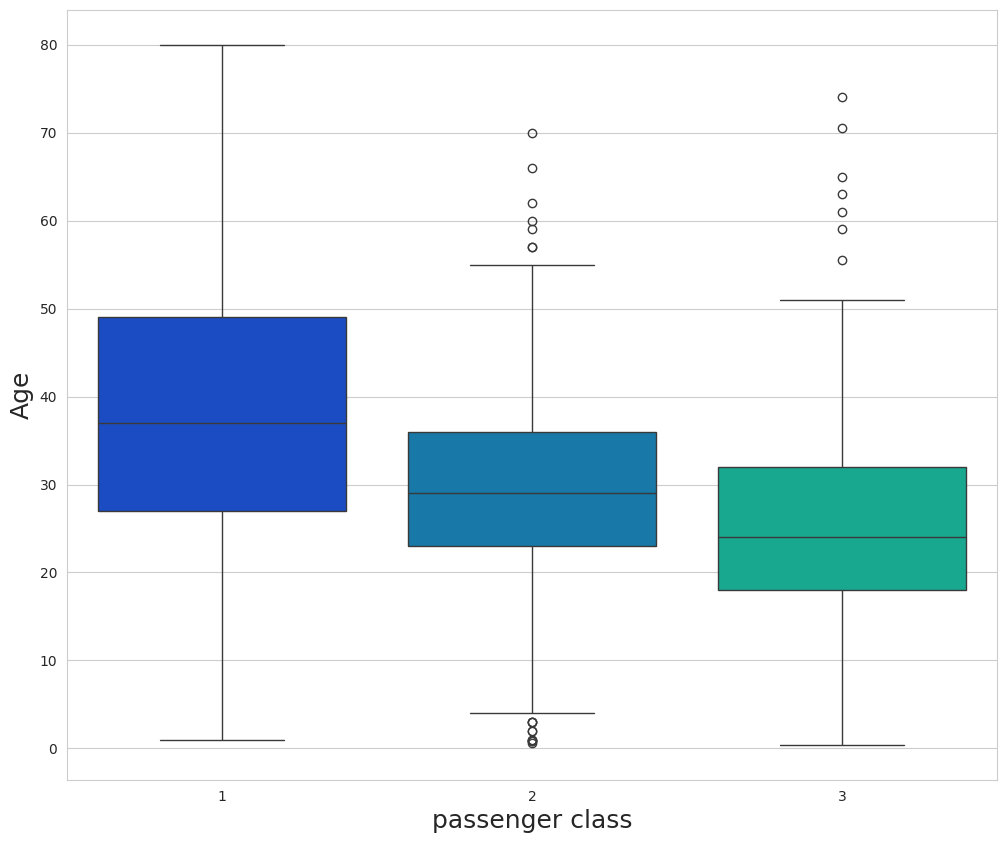

In [17]:
plt.figure(figsize=(12,10))
plt.xlabel("passenger class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [18]:
f_class_Age=df.groupby('Pclass')['Age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)
f_class_Age

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [19]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    a = df.groupby('Pclass')['Age'].mean()
    if pd.isnull(Age):
        if Pclass==1:
            return a[0]
        elif Pclass==2:
            return a[1]
        else:
            return a[2]
    else:
        return Age

In [20]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-19-986dddad6b08>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-19-986dddad6b08>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


KeyError: 0

Text(0.5, 1.0, 'bar plot of count of numeric features')

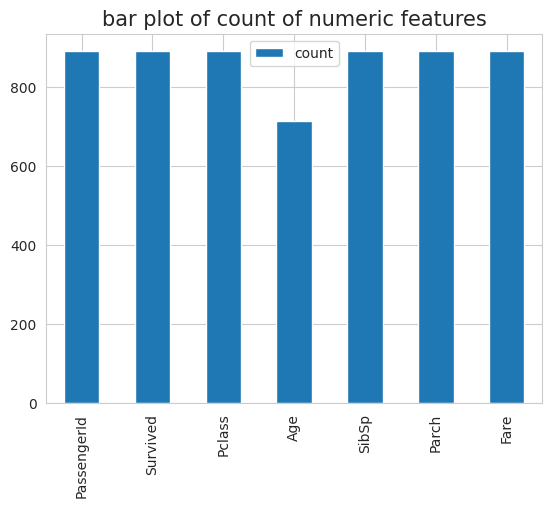

In [21]:
d=df.describe()
d=d.T
d.plot.bar(y="count")
plt.title("bar plot of count of numeric features",fontsize=15)

In [22]:

df.drop(labels = ['PassengerId','Name','Ticket','Cabin'], axis = 1, inplace = True)

In [23]:

df.dropna(inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

In [26]:

df['Sex'].value_counts()

,count
Sex,
male,453
female,259


In [27]:

Gender = encoder.fit_transform(df['Sex'])

In [28]:

df['Embarked'].value_counts()

,count
Embarked,
S,554
C,130
Q,28


In [29]:

Embarked = encoder.fit_transform(df['Embarked'])